In [130]:
import pandas as pd
import numpy as np
# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import missingno

import matplotlib.pyplot as plt

# Create an in-depth EDA on the Titanic dataset

In [131]:
df = pd.read_csv("Titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The columns Age 714, Cabin 204 and Embarked 889 have missing data.
We cannot drop the columns/rows in case to find relevant information to determine if passenger survives or not. Let's display null values 

In [133]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

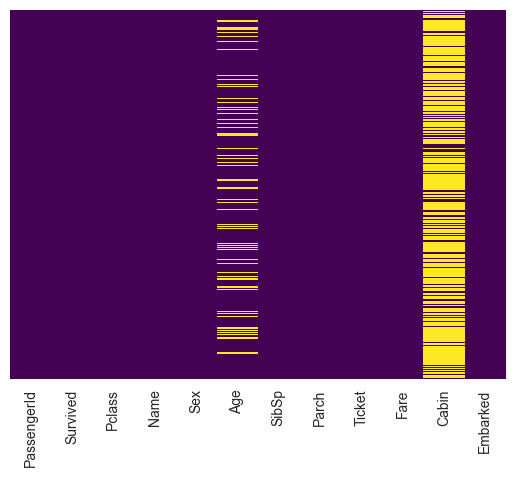

In [134]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [135]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


It is possible to observed that: PassengerID is not a relvant factor.
Age Analysis: Population have an age of 29.7 +/- 14.53 Years. Top & Down level 0.42 Years and Maximum 80 Years. 

In [136]:
# Age features to  perform analysis.
df = df.fillna(29) # Filling null Values

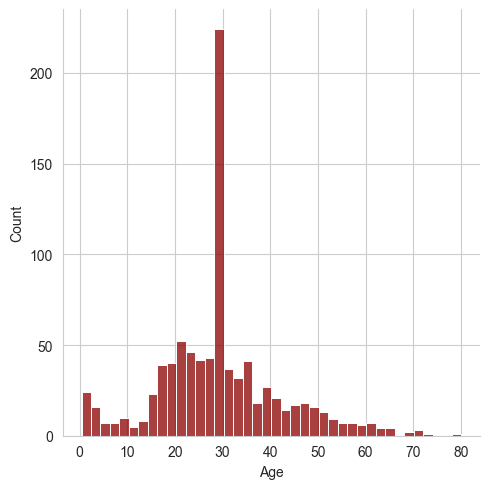

In [137]:
# plotting an age distribution
sns.set_style("whitegrid");
sns.displot(df["Age"].dropna(), kde= False, color='darkred', bins=40)
plt.show()

In [138]:
# Replacing 1 as yes and 0 as no. 
df["Survived"] = df["Survived"].map({1:"yes" , 0 :"no"})
df["Survived"].value_counts()

Survived
no     549
yes    342
Name: count, dtype: int64

From this we can observed that from 891 passengers, 549 can not survive and 342 survived (38.39%). To display this information:

<Axes: xlabel='Survived', ylabel='count'>

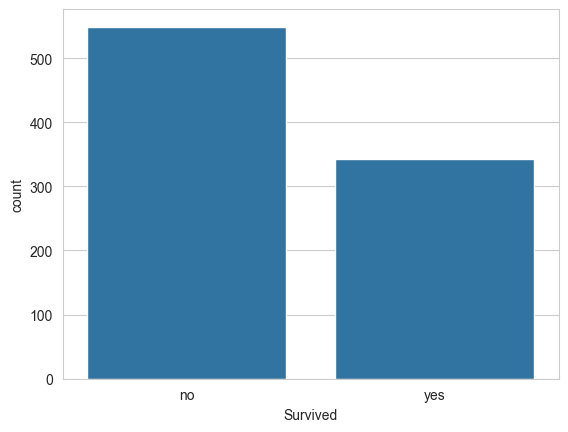

In [139]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df)

# “Women and children first”. Was this the case?

Because of the Women and children First policy, priorities were given to female passengers so the chances of survival for female passengers is increased in comparison with the male passengers, where most of them passed away.

<Axes: xlabel='Survived', ylabel='count'>

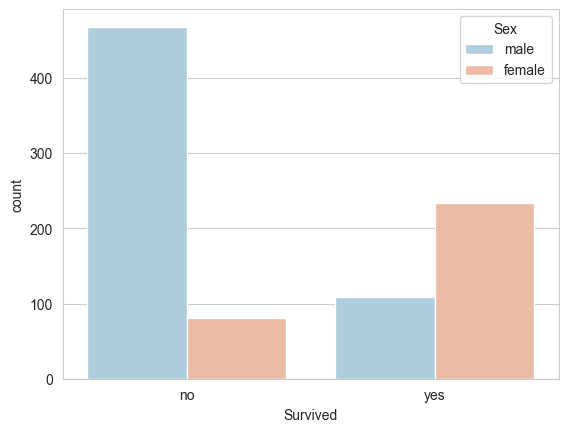

In [140]:
sns.set_style('whitegrid')
sns.countplot(x= 'Survived', hue= 'Sex', data=df, palette= 'RdBu_r')

# In the movie, the upper-class passengers were given preference on lifeboats. Does this show in the data?

Yes, Passengers who paid higher fares or travelled in the upper class had a higher chance to survive.
As you can see in the graph below. Also, this graph show the people in the age range >20 years and <45 years display the big margin of passengers who died. Meaning Children and a person in the 80 suvived. And people over 60 almmost all passed away.

c:\Users\gagva\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


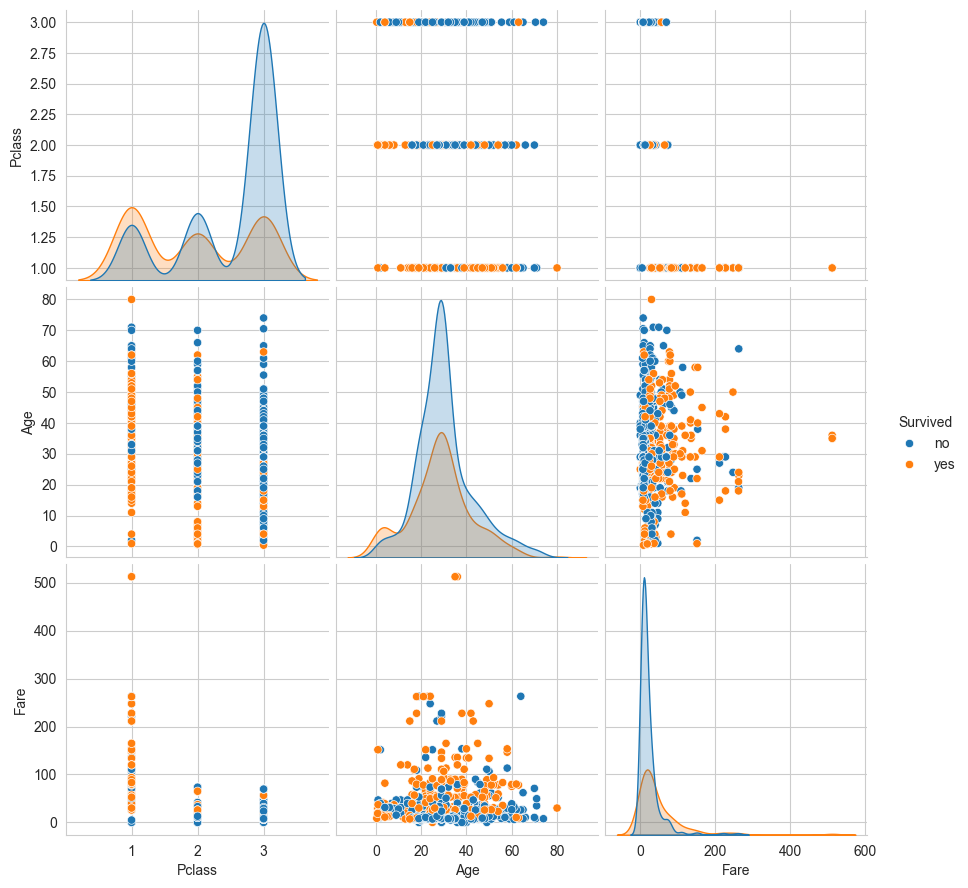

In [141]:
# Economical features to perform analysis.
sns.set_style("whitegrid");
sns.pairplot(df[["Survived","Pclass","Age","Fare"]], hue="Survived", size=3);
plt.show()

# What is the most important factor in determining survival of the Titanic incident?


It is a series of factor who determine the possibilities of survived, I would say that the most important factor is the class in which people travel.  But In the data analysis you can observe that are the people of the female sex who paid more fare to travel in upper class with an age below the 20 years old, who have a big chance of survived in the Titanic.

# Add one other observation that you have noted in the dataset.

Yes, in the data we can observe the presence of a column call SibSp who show the Number of siblings/spouses on the Titanic. But as you can see in the distribution the mayor part of the people, Approx 600, do not have siblings/spouses on Titanic. And the relation between the chance of survive and have siblings/spouses on the Titanic does not represent an important factor, but we can observe that increment to 50/50 with the presence of 1. And this chance of survived reduce significantly over 3 siblings/spouses on Titanic.

<Axes: xlabel='SibSp', ylabel='count'>

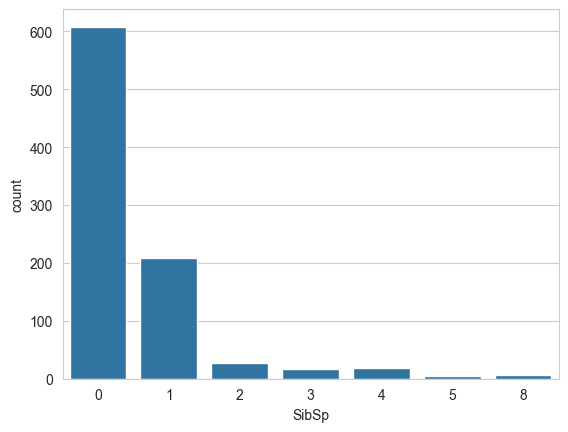

In [142]:
sns.countplot(x='SibSp', data=df)

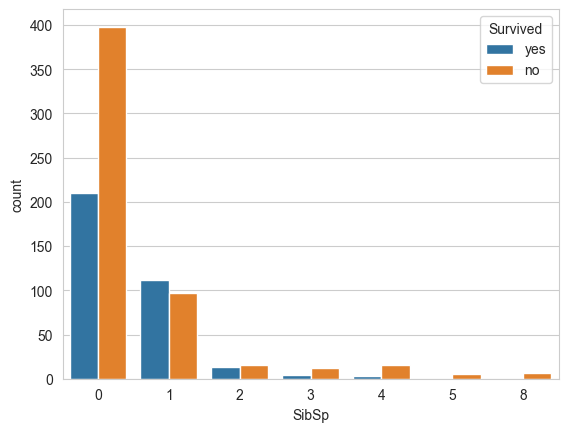

In [143]:
# showing the relation between SibSp and Survived. 
sns.countplot(x=df["SibSp"], hue=df["Survived"], data=df)
plt.show()

Another factor to evaluate is the Embarked feature: The chance of survival increases if you embarked in C or Q to the difference of passengers who started journey in S or whiout reference (all of them died).

<Axes: xlabel='Embarked', ylabel='count'>

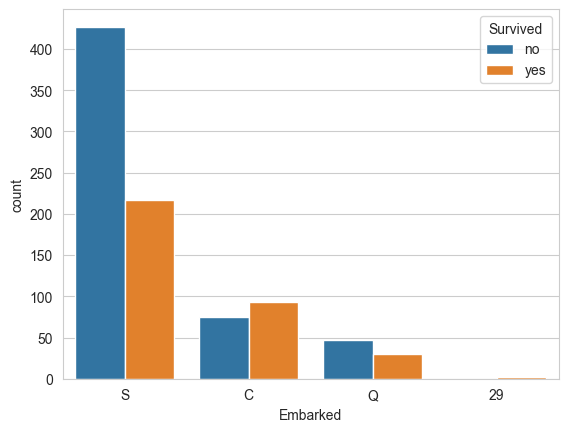

In [144]:
sns.countplot(x=df["Embarked"], hue=df["Survived"], data=df)
